In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('preprocessed_data.csv')

# Convert 'Price' column to numeric, converting non-numeric values to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)
df.dropna(inplace=True)

# Exclude 'Price' column from the features (X)
X = df.drop(columns=['Price'])

# Target variable (y) is 'Price'
y = df['Price']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted)

Mean Squared Error (MSE): 14673086.59613625
Root Mean Squared Error (RMSE): 3830.5465140285464
R-squared (R2): 0.9483449727913066
       Actual  Predicted
4357   2982.0    3308.90
3630  28152.0   27547.28
1208  10893.0   10640.21
5411   6548.0    6750.93
3183   2655.0    2735.03
...       ...        ...
3247  10284.0   10725.28
2487    778.0     813.35
5863   2510.0    2521.90
3974  17600.0    9782.08
4740  10053.0    8107.80

[1136 rows x 2 columns]


In [ ]:
# 1) L1 regularization
# 2) One-hot or any other encoding
# 3) L2 regularizations
# 4) Elastic Net
# 5) Variation and correlation amongst the data
# 6) Usage of the range values instead of the avg for temp, humidity etc

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('preprocessed_data.csv')

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt**0.5
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R-squared (R2): {r2_dt}")

actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted)

Decision Tree Model:
Mean Squared Error (MSE): 36901832.28046753
Root Mean Squared Error (RMSE): 6074.687833993409
R-squared (R2): 0.8700910583462291
       Actual  Predicted
4357   2982.0    3308.90
3630  28152.0   27547.28
1208  10893.0   10640.21
5411   6548.0    6750.93
3183   2655.0    2735.03
...       ...        ...
3247  10284.0   10725.28
2487    778.0     813.35
5863   2510.0    2521.90
3974  17600.0    9782.08
4740  10053.0    8107.80

[1136 rows x 2 columns]


In [22]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model with higher alpha for stronger regularization
ridge_alpha = 20 # Adjust the alpha as needed
ridge_model = Ridge(alpha=ridge_alpha)

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions using the Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared (R2): {r2_ridge}")

Ridge Regression Model:
Mean Squared Error (MSE): 272299685.4920772
Root Mean Squared Error (RMSE): 16501.50555228453
R-squared (R2): 0.041398169985876754


In [18]:
from sklearn.linear_model import Lasso

lasso_alpha = 20  # Adjust the alpha as needed
lasso_model = Lasso(alpha=lasso_alpha)

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions using the Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

Lasso Regression Model:
Mean Squared Error (MSE): 271561492.5278457
Root Mean Squared Error (RMSE): 16479.122929568966
R-squared (R2): 0.04399689912189131


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess your data (similar to your initial code)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Ridge and Lasso models with your chosen alpha values
ridge_alpha = 20.0  # Adjust the alpha as needed
ridge_model = Ridge(alpha=ridge_alpha)

lasso_alpha = 10.0  # Adjust the alpha as needed
lasso_model = Lasso(alpha=lasso_alpha)

# Train the Ridge and Lasso models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions using both models
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Create DataFrames for actual prices and predictions
results_df = pd.DataFrame({'Actual': y_test, 'Ridge Predicted': y_pred_ridge, 'Lasso Predicted': y_pred_lasso})

# Print the first few rows of the DataFrame to compare actual and predicted prices
print(results_df.head())


       Actual  Ridge Predicted  Lasso Predicted
4357   2982.0     12646.950974     12674.381492
3630  28152.0     16119.320992     16102.350955
1208  10893.0      6787.773962      6780.564371
5411   6548.0     13354.193489     13324.591387
3183   2655.0     10916.685956     10975.158430


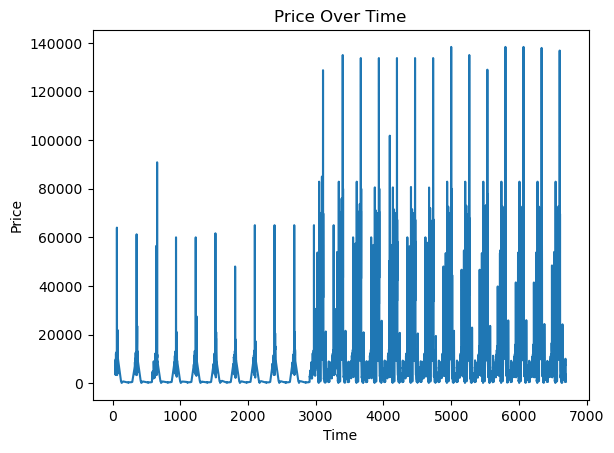

G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

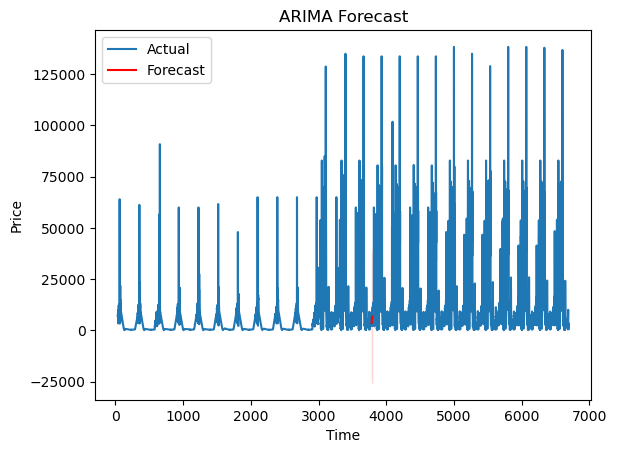

Mean Squared Error (MSE): 195820315.16831595
Root Mean Squared Error (RMSE): 13993.581213124678
Mean Absolute Error (MAE): 7629.113976616399
R-squared (R2): 0.39319747297406216
   Actual Price  Future Price
0        7619.0   3650.658635
1       10058.0   4900.164479
2        2471.0   5264.777604
3        1294.0   5515.793160
4        2876.0   5746.295129
5        3521.0   5967.714977
6        2666.0   6181.647181
7        3207.0   6388.494803
8        1515.0   6588.510511
9         649.0   6781.922130


G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your time series data
# Replace 'preprocessed_data.csv' with the path to your dataset
df = pd.read_csv('preprocessed_data.csv')

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Create a combined categorical column for time using 'Year' and 'Month'
df['time'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Plot your time series data
plt.plot(df['Price'])
plt.title('Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Check for stationarity, and apply differencing if needed
# Example:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df['Price'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

# Differencing if needed
# df_diff = df['Price'].diff().dropna()

# Plot ACF and PACF to determine the order of ARIMA(p, d, q)
# plot_acf(df_diff)
# plot_pacf(df_diff)
# plt.show()

# Fit ARIMA model
# Example: ARIMA(1, 1, 1)
model = ARIMA(df['Price'], order=(2, 0, 2))
result = model.fit()

# Get forecast
n_forecast = 10  # Adjust as needed
forecast = result.get_forecast(steps=n_forecast)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the predicted values along with confidence interval
plt.plot(df['Price'], label='Actual')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.1)
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model performance
actual_values = df['Price']
predicted_values = result.fittedvalues  # or result.predict(start=..., end=...)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

n_forecast = 10
future_forecasts = result.predict(start=len(df), end=len(df) + n_forecast - 1, typ='levels')
future_forecasts.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame({'Actual Price': df['Price'].tail(n_forecast).values, 'Future Price': future_forecasts})
print(comparison_df)


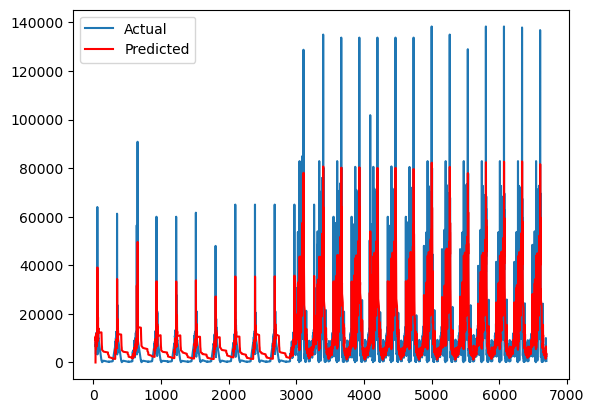

In [5]:
# Example code to plot actual vs. predicted values
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted', color='red')
plt.legend()
plt.show()


In [6]:
best_mse = float('inf')
best_order = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            model = ARIMA(df['Price'], order=(p, d, q))
            result = model.fit()
            predicted_values = result.fittedvalues
            mse = mean_squared_error(actual_values, predicted_values)

            if mse < best_mse:
                best_mse = mse
                best_order = (p, d, q)

print(f"Best ARIMA Order: {best_order}")


G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA Order: (2, 0, 2)


G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
G:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Best ARIMA Order: (2, 0, 2)
Best Model Mean Squared Error (MSE): 195820315.16831595
Best Model Root Mean Squared Error (RMSE): 13993.581213124678
Best Model Mean Absolute Error (MAE): 7629.113976616399
Best Model R-squared (R2): 0.39319747297406216


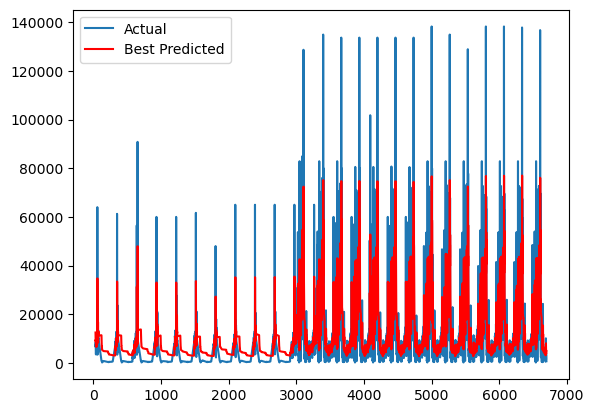

In [9]:
# Use the best order parameters obtained from the hyperparameter tuning
best_p, best_d, best_q = 2, 0, 2  # Change these values to the optimal ones

# Fit the ARIMA model with the best parameters
best_model = ARIMA(df['Price'], order=(best_p, best_d, best_q))
best_result = best_model.fit()
best_predicted_values = best_result.fittedvalues

# Evaluate the performance of the best model
best_mse = mean_squared_error(actual_values, best_predicted_values)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(actual_values, best_predicted_values)
best_r2 = r2_score(actual_values, best_predicted_values)

print(f"Best ARIMA Order: ({best_p}, {best_d}, {best_q})")
print(f"Best Model Mean Squared Error (MSE): {best_mse}")
print(f"Best Model Root Mean Squared Error (RMSE): {best_rmse}")
print(f"Best Model Mean Absolute Error (MAE): {best_mae}")
print(f"Best Model R-squared (R2): {best_r2}")

# Plot actual vs. predicted values
plt.plot(actual_values, label='Actual')
plt.plot(best_predicted_values, label='Best Predicted', color='red')
plt.legend()
plt.show()


In [6]:
# Random Forest on updated dataset (randomized rainfall, temperature and humidity data for 2020 and 2021)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('preprocessed_data_2.csv')

# Convert 'Price' column to numeric, converting non-numeric values to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)
df.dropna(inplace=True)

# Exclude 'Price' column from the features (X)
X = df.drop(columns=['Price'])

# Target variable (y) is 'Price'
y = df['Price']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted)

Mean Squared Error (MSE): 14552351.390526077
Root Mean Squared Error (RMSE): 3814.754433843164
R-squared (R2): 0.9612994464099602
      Actual  Predicted
5370    2968    3154.66
5299   24108   25001.45
199     3251    3249.70
3268   11494   12272.11
3504    1482    1561.64
...      ...        ...
321     3463    3657.18
3491    6656    6066.32
4043    2657    2689.55
3945    6383    6055.96
3542    2712    2603.16

[1764 rows x 2 columns]


In [4]:
# Decision Tree on updated dataset (randomized rainfall, temperature and humidity data for 2020 and 2021)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('preprocessed_data_2.csv')

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt**0.5
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R-squared (R2): {r2_dt}")

actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted)

Decision Tree Model:
Mean Squared Error (MSE): 17015349.365646258
Root Mean Squared Error (RMSE): 4124.966589640001
R-squared (R2): 0.9547493444662735
      Actual  Predicted
5370    2968    3154.66
5299   24108   25001.45
199     3251    3249.70
3268   11494   12272.11
3504    1482    1561.64
...      ...        ...
321     3463    3657.18
3491    6656    6066.32
4043    2657    2689.55
3945    6383    6055.96
3542    2712    2603.16

[1764 rows x 2 columns]


In [8]:
# XGBoost on updated dataset (randomized rainfall, temperature and humidity data for 2020 and 2021)
import xgboost as xgb

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)
df.dropna(inplace=True)

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 14822477.379699612
Root Mean Squared Error (RMSE): 3849.99706229753
R-squared (R2): 0.9605810727918741


In [29]:
# emsemble classifiers with RF, DT and XGBoost for the price prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,ElasticNet

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create individual regression models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Create a Voting Regressor with the individual models
ensemble_model = VotingRegressor(
    estimators=[
        ("rf", rf_model),
        ("dt", dt_model),
        ("xgb", xgb_model),
        ("en", en_model),
    ]
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 37602386.33746646
Root Mean Squared Error (RMSE): 6132.0784679802055
R-squared (R2): 0.9000001354754332
